## Creating Subset from the Original Data for Learning Purpose

In [11]:
import os
import shutil
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
import torch

In [ ]:
# 원본 데이터셋 경로와 하위 집합 경로 설정

source_train_dir = r'C:\Users\user\Documents\EcoUp\Honeybee Data\OpenData\Data\Training\Source Data\TS\유충'  # Path to 유충 training folders
source_val_dir = r'C:\Users\user\Documents\EcoUp\Honeybee Data\OpenData\Data\Validation\Source Data\VS\유충'  # Path to 유충 validation folders


output_train_dir = r"C:\Users\khush\OneDrive\Documents\EcoUp\CNN Model\Training"  # Path where the training subset will be saved
output_val_dir = r"C:\Users\khush\OneDrive\Documents\EcoUp\CNN Model\Validation"  # Path where the validation subset will be saved

# Define the categories to include in the subset
categories = ['유충_부저병', '유충_석고병', '유충_응애', '유충_정상']

# Number of images per category for the subset
num_train_images_per_category = 5000  # Extract 5000 images per category for training
num_val_images_per_category = 500  # Extract 500 images per category for validation

# Function to create the subset of images
def create_image_subset(source_dir, output_dir, categories, num_images_per_category):
    os.makedirs(output_dir, exist_ok=True)

    for category in categories:
        category_path = os.path.join(source_dir, category)
        category_output_path = os.path.join(output_dir, category)
        os.makedirs(category_output_path, exist_ok=True)

        # List all subfolders (each folder containing an image) within the category
        image_folders = [f for f in os.listdir(category_path) if os.path.isdir(os.path.join(category_path, f))]

        # Copy the images from the subfolders to the category folder
        images_copied = 0
        for image_folder in image_folders:
            image_folder_path = os.path.join(category_path, image_folder)
            image_files = [f for f in os.listdir(image_folder_path) if f.endswith('.jpg')]

            # Copy the first image found in each folder
            if image_files:
                img_file = image_files[0]
                img_src_path = os.path.join(image_folder_path, img_file)
                img_dst_path = os.path.join(category_output_path, img_file)
                shutil.copy(img_src_path, img_dst_path)
                images_copied += 1

            if images_copied >= num_images_per_category:
                break

        print(f'Copied {images_copied} images from {category}')

# 훈련용 및 검증용 하위 집합 생성

# Create training subset (5,000 images per category)
create_image_subset(source_train_dir, output_train_dir, categories, num_train_images_per_category)

# Create validation subset (500 images per category)
create_image_subset(source_val_dir, output_val_dir, categories, num_val_images_per_category)


## 이미지 전처리 (Image Preprocessing) 

### 1. 크기 조정 (Resizing):
 
원본 데이터셋의 이미지 크기는 다양합니다. 모델은 고정된 크기의 입력을 필요로 하므로, 모든 이미지를 동일한 크기로 변환해야 합니다.

The original dataset contains images of varying sizes. Since the model requires a fixed input size, all images must be resized to a uniform dimension.

In [2]:
# Dataset directories
train_dir = r"C:\Users\khush\OneDrive\Documents\EcoUp\CNN Model\Training"
val_dir = r"C:\Users\khush\OneDrive\Documents\EcoUp\CNN Model\Validation"

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager

# 폰트 경로 설정 (Windows용)
font_path = r"C:\Users\khush\AppData\Local\Microsoft\Windows\Fonts\NanumGothic-Regular.ttf"  # 설치된 폰트 경로 확인 후 수정

font_prop = font_manager.FontProperties(fname=font_path).get_name()

# 한글 폰트 적용
plt.rcParams['font.family'] = font_prop
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

print("한글 폰트 설정 완료!")


한글 폰트 설정 완료!


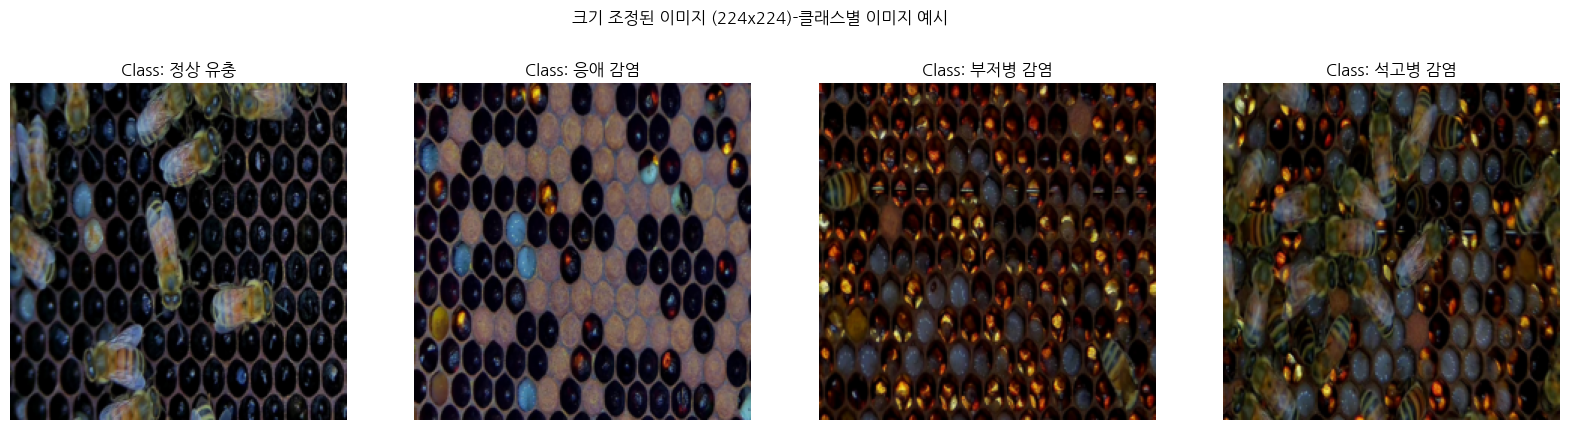

In [8]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from PIL import Image

# 클래스 인덱스와 한글 이름 매핑
class_mapping = {
    0: "정상 유충",
    1: "응애 감염",
    2: "부저병 감염",
    3: "석고병 감염"
}

# 훈련 데이터셋 로드
train_dataset = datasets.ImageFolder(train_dir, transform=resize_transform)

# # 각 클래스에서 이미지 하나씩 시각화하는 함수
# def visualize_images_by_class(dataset, title):
#     class_samples = {}  # 각 클래스에서 이미지 1개를 저장
#     for image, label in dataset:
#         if label not in class_samples:
#             class_samples[label] = image  # 해당 클래스의 첫 번째 이미지를 저장
#         if len(class_samples) == len(class_mapping):  # 모든 클래스에서 이미지가 확보되면 중단
#             break
    
#     # 시각화
#     fig, axes = plt.subplots(1, len(class_mapping), figsize=(20, 5))
#     for i, (label, image) in enumerate(class_samples.items()):
#         image = image.permute(1, 2, 0).numpy()  # Tensor -> Numpy 변환
#         axes[i].imshow(image)
#         axes[i].axis('off')
#         axes[i].set_title(f"Class: {class_mapping[label]}")
#     plt.suptitle(title)
#     plt.show()

# # 클래스별 이미지 시각화
# visualize_images_by_class(train_dataset, "크기 조정된 이미지 (224x224)-클래스별 이미지 예시")


# 각 클래스에서 이미지 하나씩 시각화하는 함수 (최적화된 버전)
def visualize_images_by_class_all(dataset, title):
    class_samples = {}  # 각 클래스의 첫 이미지를 저장
    for image, label in dataset:
        if label not in class_samples:  # 각 클래스의 첫 이미지만 저장
            class_samples[label] = image
        if len(class_samples) == len(class_mapping):  # 모든 클래스가 확보되면 중단
            break
    
    # 시각화: 각 클래스에 대한 이미지 표시
    fig, axes = plt.subplots(1, len(class_mapping), figsize=(20, 5))
    for i, label in enumerate(sorted(class_mapping.keys())):
        if label in class_samples:  # 클래스에 해당하는 이미지가 있을 때만 표시
            image = class_samples[label].permute(1, 2, 0).numpy().clip(0, 1)  # Tensor -> 이미지 변환
            axes[i].imshow(image)
            axes[i].axis('off')
            axes[i].set_title(f"Class: {class_mapping[label]}")
        else:
            axes[i].axis('off')  # 이미지가 없는 클래스는 빈 공간으로 둠
            axes[i].set_title(f"Class: {class_mapping[label]} (Empty)")
    plt.suptitle(title)
    plt.show()

# 클래스별 이미지 시각화 실행
visualize_images_by_class_all(train_dataset, "크기 조정된 이미지 (224x224)-클래스별 이미지 예시")


### 2. 정규화 (Normalization)

이미지의 픽셀 값은 일반적으로 0에서 255 사이의 정수로 표현됩니다. 정규화를 통해 픽셀 값을 모델이 더 쉽게 처리할 수 있는 범위로 변환합니다.

Image pixel values are typically represented as integers ranging from 0 to 255. Through normalization, these values are transformed into a range that makes it easier for the model to process efficiently.

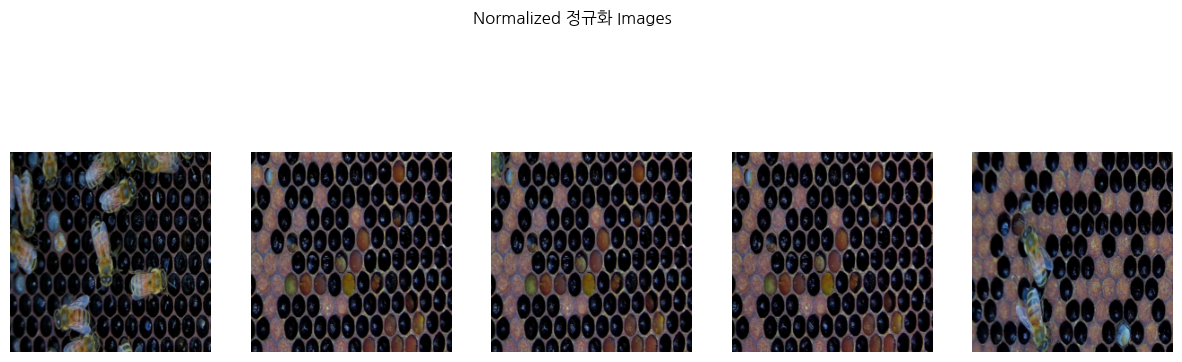

In [12]:
# 정규화 변환
normalize_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 정규화 시각화 함수
def visualize_normalization(dataset, normalize_transform, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        image, _ = dataset[i]  # Tensor 이미지를 가져옴
        image_normalized = normalize_transform(image)  # 정규화만 적용
        
        # 정규화 해제 (시각화를 위해)
        image_unorm = image_normalized * torch.tensor([0.229, 0.224, 0.225])[:, None, None] + torch.tensor([0.485, 0.456, 0.406])[:, None, None]
        axes[i].imshow(image_unorm.permute(1, 2, 0).numpy().clip(0, 1))  # Tensor -> Numpy 변환
        axes[i].axis('off')
    plt.suptitle(title)
    plt.show()

# 정규화 변환 (ToTensor 제외)
normalize_only_transform = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# 시각화 실행
visualize_normalization(train_dataset, normalize_only_transform, "Normalized 정규화 Images")



### 3. 데이터 증강 (Data Augmentation)

데이터 증강은 모델의 일반화 능력을 향상시키기 위해 원본 데이터를 변형하는 과정입니다.

#### 주요 증강 기법:

회전 (Rotation): 이미지를 특정 각도로 회전시킴.
    
플립 (Flip): 이미지를 수평 또는 수직으로 뒤집음.
    
밝기 조정 (Brightness Adjustment): 이미지의 밝기를 증가 또는 감소시킴.
    
Data augmentation is the process of transforming the original data to enhance the model’s generalization ability.

Key Augmentation Techniques:

Rotation: Rotating the image by a certain angle.

Flip: Flipping the image horizontally or vertically.

Brightness Adjustment: Increasing or decreasing the image brightness.

In [15]:
# 데이터 증강 변환 정의
augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # 50% 확률로 수평 뒤집기
    transforms.RandomRotation(30),          # -30도 ~ +30도 회전
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

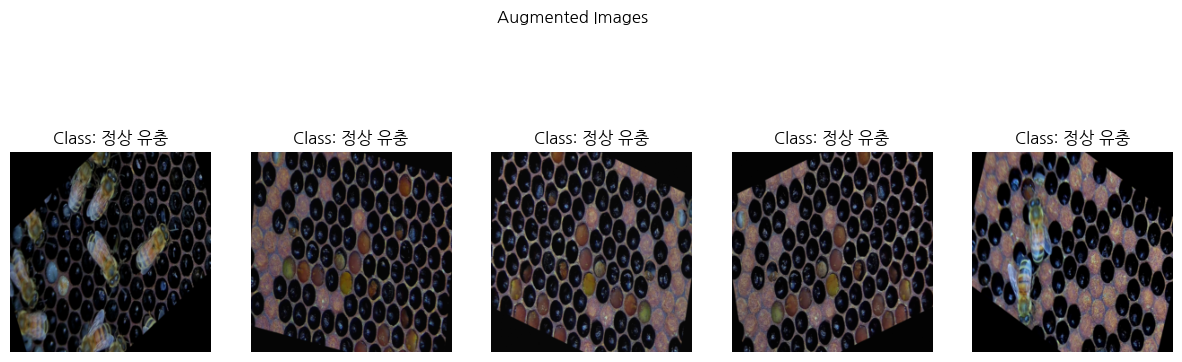

In [16]:
# 시각화 함수 정의 (빠른 시각화, 첫 5개 이미지만)
def visualize_images(dataset, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        image, label = dataset[i]  # 이미지와 라벨 가져오기
        image = image.permute(1, 2, 0).numpy().clip(0, 1)  # Tensor -> Numpy 변환
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f"Class: {class_mapping[label]}")
    plt.suptitle(title)
    plt.show()

# 클래스 매핑 (클래스 이름을 한글로 설정)
class_mapping = {
    0: "정상 유충",
    1: "응애 감염",
    2: "부저병 감염",
    3: "석고병 감염"
}


# 증강 데이터셋 로드
augmented_dataset = datasets.ImageFolder(train_dir, transform=augmentation_transform)

# 증강 이미지 시각화
visualize_images(augmented_dataset, "Augmented Images")

### 4. Grayscale Conversion (그레이스케일 변환)
목적: 이미지의 색상 정보를 제거하여 모델이 패턴과 구조에 집중하게 합니다.

 Removing color information from images to help the model focus on patterns and structural details.

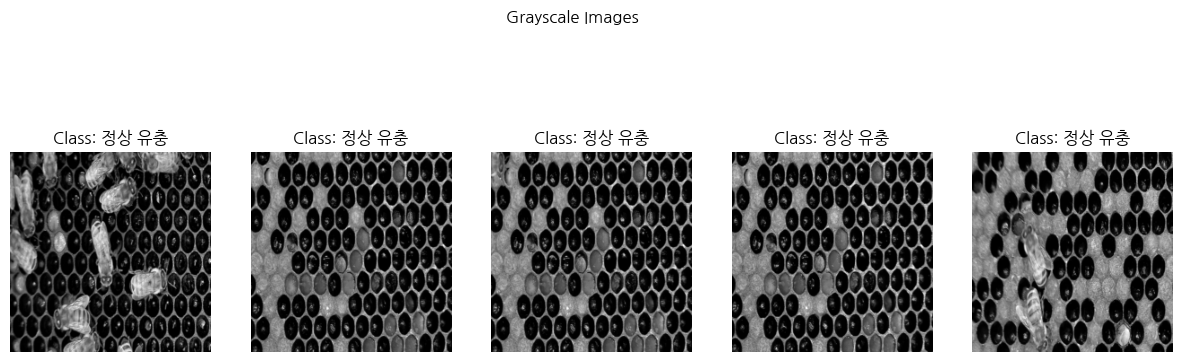

In [17]:
# 그레이스케일 변환 정의
grayscale_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # 흑백 변환 (1 채널)
    transforms.Resize((224, 224)),                # 크기 조정
    transforms.ToTensor()                         # Tensor로 변환
])

# 그레이스케일 데이터셋 로드
grayscale_dataset = datasets.ImageFolder(train_dir, transform=grayscale_transform)

# 그레이스케일 이미지 시각화
def visualize_grayscale_images(dataset, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        image, label = dataset[i]  # 이미지 가져오기
        axes[i].imshow(image.squeeze(), cmap='gray')  # 흑백 이미지를 표시
        axes[i].axis('off')
        axes[i].set_title(f"Class: {class_mapping[label]}")
    plt.suptitle(title)
    plt.show()

visualize_grayscale_images(grayscale_dataset, "Grayscale Images")


### 5. Blurring (Gaussian Blur) (블러링)
목적: 이미지를 흐리게 하여 모델이 세부 텍스처가 아닌 전체적인 패턴에 집중하도록 돕습니다.
Blurring the image helps the model focus on overall patterns rather than fine textures.

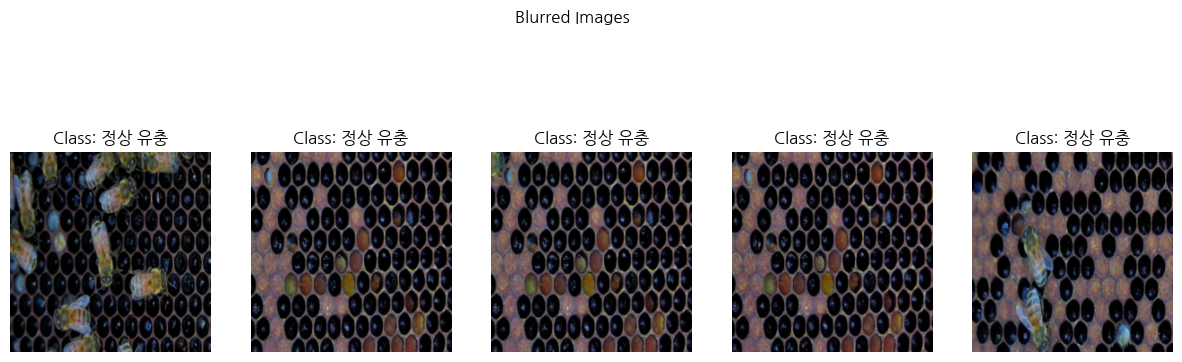

In [19]:
from PIL import ImageFilter

# 사용자 정의 블러링 클래스
class GaussianBlurTransform:
    def __init__(self, radius=2):
        self.radius = radius

    def __call__(self, image):
        return image.filter(ImageFilter.GaussianBlur(self.radius))  # Gaussian Blur 적용

# 블러링 변환 정의
blurring_transform = transforms.Compose([
    GaussianBlurTransform(radius=2),  # 가우시안 블러링
    transforms.Resize((224, 224)),    # 크기 조정
    transforms.ToTensor()             # Tensor로 변환
])

# 블러링 데이터셋 로드
blurred_dataset = datasets.ImageFolder(train_dir, transform=blurring_transform)

# 블러링 이미지 시각화
def visualize_blurred_images(dataset, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        image, label = dataset[i]
        axes[i].imshow(image.permute(1, 2, 0).numpy().clip(0, 1))  # Tensor -> Numpy
        axes[i].axis('off')
        axes[i].set_title(f"Class: {class_mapping[label]}")
    plt.suptitle(title)
    plt.show()

visualize_blurred_images(blurred_dataset, "Blurred Images")

## Final Combined Preprocessing Pipeline (최종 전처리 파이프라인 )
목적: 모든 주요 전처리 기법(데이터 증강, 정규화 등)을 통합하여 훈련 및 검증 데이터셋을 준비합니다.
All key preprocessing techniques, including data augmentation and normalization, are integrated to prepare the training and validation datasets.

In [20]:
# 훈련 데이터 변환: 데이터 증강 + 정규화
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # 수평 뒤집기
    transforms.RandomRotation(30),          # 회전
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 밝기, 대비, 채도 조정
    transforms.Resize((224, 224)),          # 크기 조정
    transforms.ToTensor(),                  # Tensor 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 정규화
])

# 검증 데이터 변환: 크기 조정 + 정규화 (데이터 증강 없음)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),          # 크기 조정
    transforms.ToTensor(),                  # Tensor 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 정규화
])

# 최종 데이터셋 로드
train_dataset_final = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset_final = datasets.ImageFolder(val_dir, transform=val_transform)

# DataLoader 생성
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset_final, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset_final, batch_size=32, shuffle=False)

print(f"훈련 배치 수: {len(train_loader)}, 검증 배치 수: {len(val_loader)}")
print("최종 데이터셋 준비 완료!")

훈련 배치 수: 625, 검증 배치 수: 63
최종 데이터셋 준비 완료!
